## Collecting, Preprocessing and Exploring the Data

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Fetch Data

In [2]:
assets = ['TSLA', 'BND', 'SPY']
data = yf.download(assets, start='2015-01-01', end='2025-02-28')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [3]:
data

Price           Close                               High              \
Ticker            BND         SPY        TSLA        BND         SPY   
Date                                                                   
2015-01-02  62.573135  172.592834   14.620667  62.603419  173.811068   
2015-01-05  62.754814  169.475922   14.006000  62.777526  171.702325   
2015-01-06  62.936531  167.879639   14.085333  63.125802  170.316081   
2015-01-07  62.974373  169.971603   14.063333  63.050080  170.316070   
2015-01-08  62.875938  172.987762   14.041333  62.921362  173.206211   
...               ...         ...         ...        ...         ...   
2025-02-21  72.769997  599.940002  337.799988  72.860001  610.299988   
2025-02-24  72.870003  597.210022  330.529999  72.919998  603.030029   
2025-02-25  73.330002  594.239990  302.799988  73.330002  597.890015   
2025-02-26  73.440002  594.539978  290.799988  73.480003  599.580017   
2025-02-27  73.349998  585.049988  281.950012  73.419998  598.020020   

Price                         Low                               Open  \
Ticker            TSLA        BND         SPY        TSLA        BND   
Date                                                                   
2015-01-02   14.883333  62.399003  171.542642   14.217333  62.406576   
2015-01-05   14.433333  62.610966  169.165069   13.810667  62.641250   
2015-01-06   14.280000  62.860824  167.073085   13.614000  62.860824   
2015-01-07   14.318667  62.875954  168.770189   13.985333  62.944089   
2015-01-08   14.253333  62.815370  171.383078   14.000667  62.921362   
...                ...        ...         ...         ...        ...   
2025-02-21  354.980011  72.529999  599.469971  334.420013  72.540001   
2025-02-24  342.399994  72.690002  596.489990  324.700012  72.699997   
2025-02-25  328.890015  73.050003  589.559998  297.250000  73.110001   
2025-02-26  309.000000  73.209999  591.859985  288.040009  73.309998   
2025-02-27  297.230011  73.220001  584.650024  280.880005  73.309998   

Price                                 Volume                        
Ticker             SPY        TSLA       BND        SPY       TSLA  
Date                                                                
2015-01-02  173.390991   14.858000   2218800  121465900   71466000  
2015-01-05  171.534297   14.303333   5820100  169632600   80527500  
2015-01-06  169.786780   14.004000   3887600  209151400   93928500  
2015-01-07  169.223867   14.223333   2433400  125346700   44526000  
2015-01-08  171.399871   14.187333   1873400  147217800   51637500  
...                ...         ...       ...        ...        ...  
2025-02-21  610.159973  353.440002   4460600   76519800   74058600  
2025-02-24  602.020020  338.140015   5580100   50737200   76052300  
2025-02-25  597.150024  327.019989   4835300   58266500  134228800  
2025-02-26  595.929993  303.709991   5825400   43321600  100118300  
2025-02-27  596.849976  291.160004  14908500   74196700  101748200  

[2554 rows x 15 columns]

# Data Cleaning and EDA

In [4]:
# Reset column index
data = data.reset_index()
data.columns.name = None

In [5]:
# Checking basic statistics
data.describe()

Price                            Date        Close                            \
Ticker                                         BND          SPY         TSLA   
count                            2554  2554.000000  2554.000000  2554.000000   
mean    2020-01-28 10:09:29.459671296    69.313615   318.199794   119.569412   
min               2015-01-02 00:00:00    61.860897   156.800842     9.578000   
25%               2017-07-17 06:00:00    65.581978   215.162472    17.317334   
50%               2020-01-29 12:00:00    68.392464   280.507050    34.132999   
75%               2022-08-10 18:00:00    72.872738   409.145958   223.220005   
max               2025-02-27 00:00:00    78.823265   612.929993   479.859985   
std                               NaN     4.782577   120.043829   117.796790   

Price          High                                    Low               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2554.000000  2554.000000  2554.000000  2554.000000  2554.000000   
mean      69.415399   319.870050   122.259823    69.209923   316.281624   
min       61.937373   157.864136    10.331333    61.822658   154.676898   
25%       65.642885   216.223362    17.558833    65.513234   214.559180   
50%       68.541517   283.843573    34.410666    68.244459   278.419981   
75%       72.938781   410.985455   229.025002    72.723505   405.804733   
max       78.920157   613.229980   488.540009    78.788028   609.559998   
std        4.790759   120.617076   120.593042     4.772440   119.382633   

Price                       Open                                  Volume  \
Ticker         TSLA          BND          SPY         TSLA           BND   
count   2554.000000  2554.000000  2554.000000  2554.000000  2.554000e+03   
mean     116.797341    69.317027   318.159960   119.633125  4.251110e+06   
min        9.403333    61.891492   156.354943     9.488000  0.000000e+00   
25%       16.964500    65.582049   215.399395    17.291500  2.074300e+06   
50%       32.805666    68.354482   281.661324    33.633333  3.842650e+06   
75%      218.299995    72.842048   408.305921   223.967495  5.661825e+06   
max      457.510010    78.884927   611.539978   475.899994  3.193720e+07   
std      114.995049     4.783350   120.052897   117.957333  2.799848e+06   

Price                               
Ticker           SPY          TSLA  
count   2.554000e+03  2.554000e+03  
mean    8.683088e+07  1.118042e+08  
min     2.027000e+07  1.062000e+07  
25%     5.826695e+07  6.681495e+07  
50%     7.615245e+07  9.240920e+07  
75%     1.013366e+08  1.290345e+08  
max     5.072443e+08  9.140820e+08  
std     4.487534e+07  7.367190e+07

In [6]:
# Check for missing values
data.isnull().sum()

Price   Ticker
Date              0
Close   BND       0
        SPY       0
        TSLA      0
High    BND       0
        SPY       0
        TSLA      0
Low     BND       0
        SPY       0
        TSLA      0
Open    BND       0
        SPY       0
        TSLA      0
Volume  BND       0
        SPY       0
        TSLA      0
dtype: int64

In [7]:
# Interpolating missing values
data = data.interpolate()

In [ ]:
data.to_csv('../data/cleaned_data.csv', index=True, header=True)

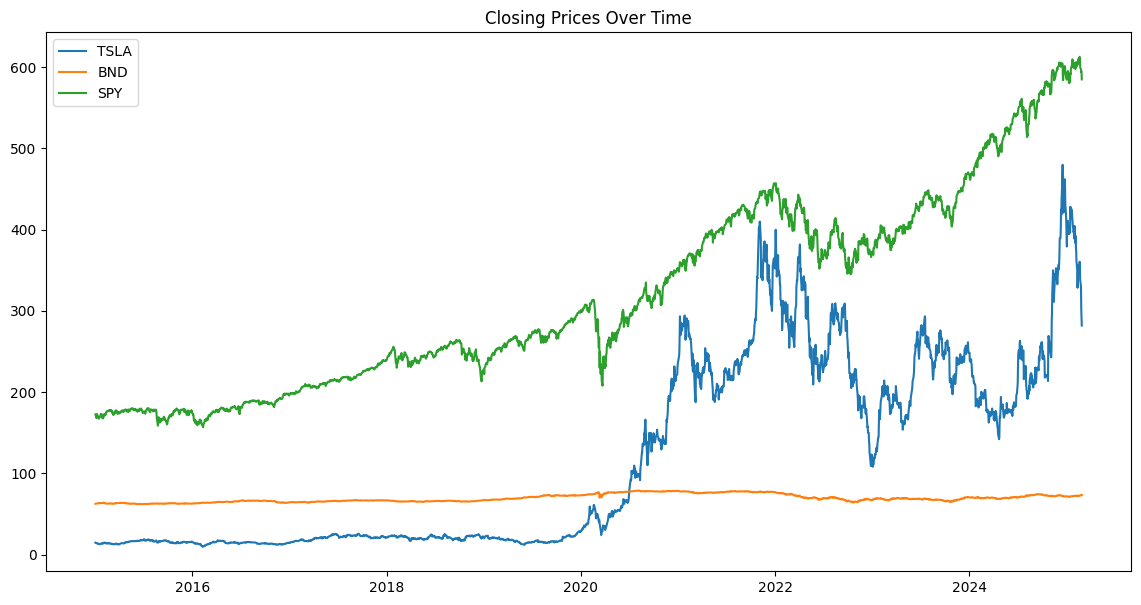

In [9]:
# Visualizing Closing Prices
plt.figure(figsize=(14, 7))
for asset in assets:
    plt.plot(data['Date'], data[('Close', asset)], label=asset)
plt.title('Closing Prices Over Time')
plt.legend()
plt.show()

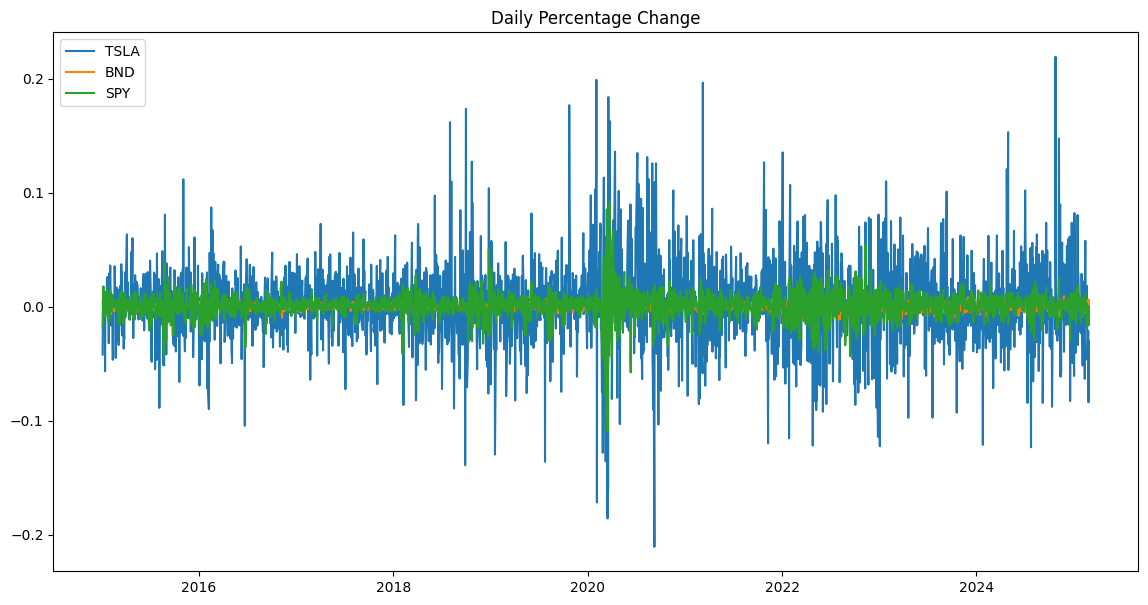

In [10]:
# Daily Percentage Change
data = data.set_index('Date')
returns = data['Close'].pct_change()
returns = returns.dropna()

plt.figure(figsize=(14, 7))
for asset in assets:
    plt.plot(returns.index, returns[asset], label=asset)
plt.title('Daily Percentage Change')
plt.legend()
plt.show()

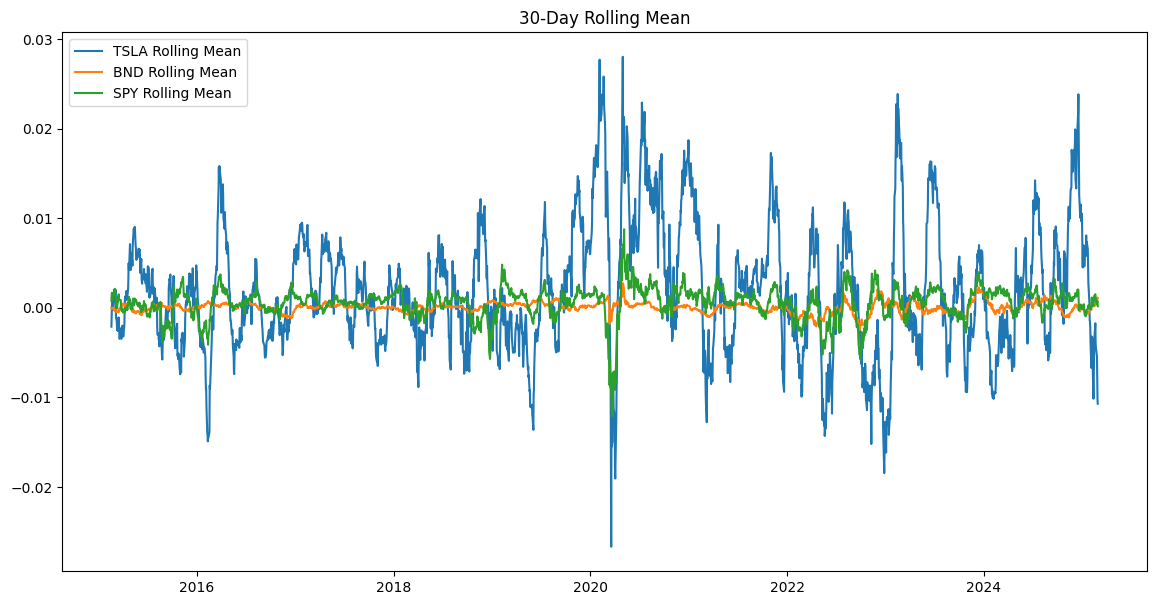

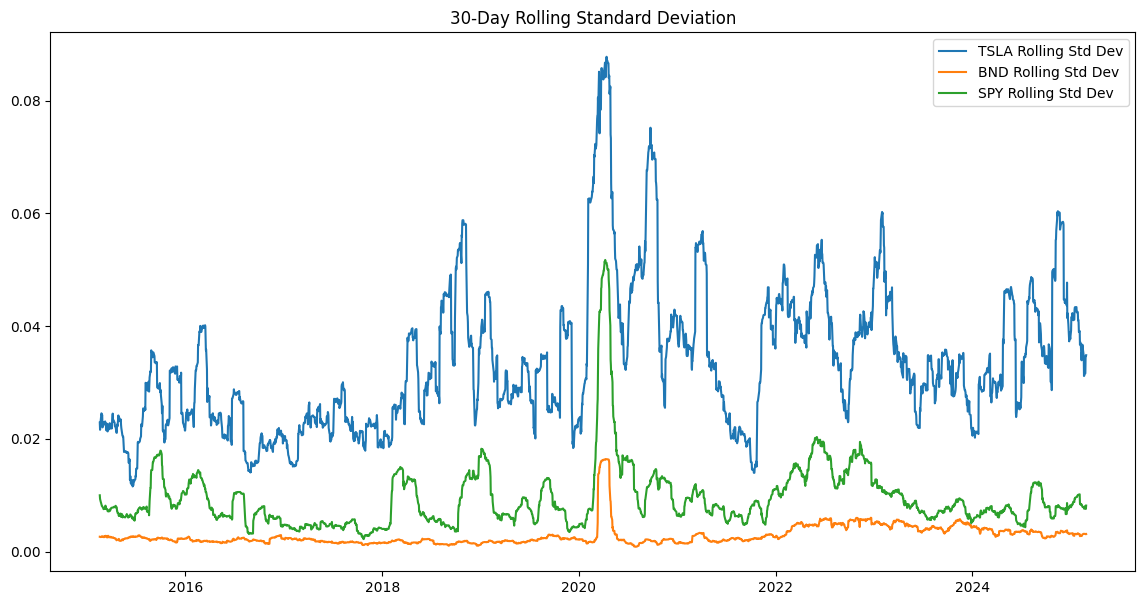

In [11]:
# Rolling Mean and Standard Deviation
window = 30
rolling_means = returns.rolling(window=window).mean()
rolling_stds = returns.rolling(window=window).std()

plt.figure(figsize=(14, 7))
for asset in assets:
    plt.plot(rolling_means.index, rolling_means[asset], label=f'{asset} Rolling Mean')
plt.title(f'{window}-Day Rolling Mean')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
for asset in assets:
    plt.plot(rolling_stds.index, rolling_stds[asset], label=f'{asset} Rolling Std Dev')
plt.title(f'{window}-Day Rolling Standard Deviation')
plt.legend()
plt.show()

In [12]:
# Outlier Detection
z_scores = (returns - returns.mean()) / returns.std()
outliers = z_scores[abs(z_scores) > 3]

print("Outliers Detected:")
print(outliers.dropna())

Outliers Detected:
Ticker            BND       SPY      TSLA
Date                                     
2020-03-12 -15.897099 -8.699010 -3.274592
2020-03-16   3.048635 -9.941848 -5.206557
2020-03-18  -7.067141 -4.626535 -4.500614


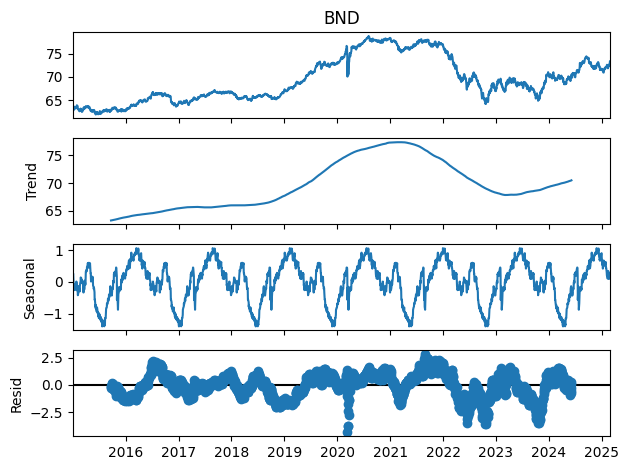

In [13]:
# Seasonality Decomposition for BND
decompose = seasonal_decompose(data['Close']['BND'], model='additive', period=365)
decompose.plot()
plt.show()

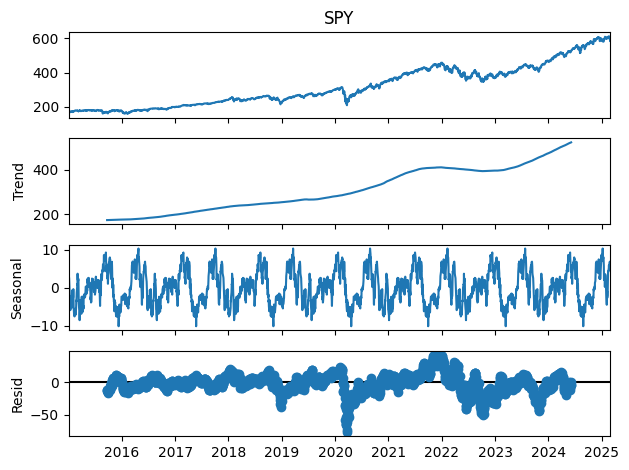

In [14]:
# Seasonality Decomposition for SPY
decompose = seasonal_decompose(data['Close']['SPY'], model='additive', period=365)
decompose.plot()
plt.show()

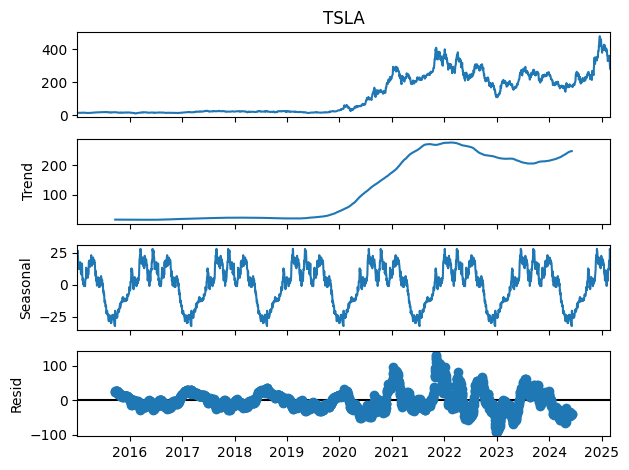

In [15]:
# Seasonality Decomposition for TSLA
decompose = seasonal_decompose(data['Close']['TSLA'], model='additive', period=365)
decompose.plot()
plt.show()

In [16]:
# VaR Calculation
confidence_level = 0.05
VaR = returns.quantile(confidence_level)
print(f"Value at Risk (VaR) at {confidence_level * 100}% confidence level:\n{VaR}")

Value at Risk (VaR) at 5.0% confidence level:
Ticker
BND    -0.004802
SPY    -0.016722
TSLA   -0.051915
Name: 0.05, dtype: float64


In [17]:
# Sharpe Ratio
risk_free_rate = 0.02  # Example risk-free rate
sharpe_ratios = (returns.mean() - risk_free_rate) / returns.std()
print("Sharpe Ratios:")
print(sharpe_ratios)

Sharpe Ratios:
Ticker
BND    -5.818897
SPY    -1.759416
TSLA   -0.504993
dtype: float64


In [18]:
# Key Insights
print("Key Insights:")
key_insights = {
    "Tesla": "High volatility with significant price fluctuations.",
    "BND": "Stable, low-risk returns.",
    "SPY": "Moderate risk with diversified exposure."
}
for asset, insight in key_insights.items():
    print(f"- {asset}: {insight}")

Key Insights:
- Tesla: High volatility with significant price fluctuations.
- BND: Stable, low-risk returns.
- SPY: Moderate risk with diversified exposure.
